## Import Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [5]:
df_train = pd.read_csv("train_data_enriched.csv")
df_test = pd.read_csv("test_data_enriched.csv")

C:\Users\ritae\AppData\Local\Temp\ipykernel_9880\1983271686.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("train_data_enriched.csv")
C:\Users\ritae\AppData\Local\Temp\ipykernel_9880\1983271686.py:2: DtypeWarning: Columns (2,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv("test_data_enriched.csv")


## Looking At The Enriched Data

In [31]:
df_train.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'IME-4 Count', 'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Code',
       'WCIO Part Of Body Description', 'Zip Code', 'Number of Dependents',
       'Accident Year', 'Accident Month', 'Accident Day', 'Accident DayOfWeek',
       'Assembly Date DSA', 'C-2 Date DSA', 'C-3 Date DSA',
       'First Hearing Date DSA', 'Age at Injury Category',
       'Carrier Claim Category', 'Body Section', 'Age Group'],
      dtype='object')

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573188 entries, 0 to 573187
Data columns (total 42 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Accident Date                      569499 non-null  object  
 1   Age at Injury                      567724 non-null  float64 
 2   Alternative Dispute Resolution     573183 non-null  object  
 3   Assembly Date                      573188 non-null  object  
 4   Attorney/Representative            573188 non-null  bool    
 5   Average Weekly Wage                544570 non-null  float64 
 6   Birth Year                         519125 non-null  float64 
 7   C-2 Date                           558636 non-null  object  
 8   C-3 Date                           187101 non-null  object  
 9   Carrier Name                       573188 non-null  object  
 10  Carrier Type                       571414 non-null  object  
 11  Claim Identifier          

## Exploring Numeric Features Correlation

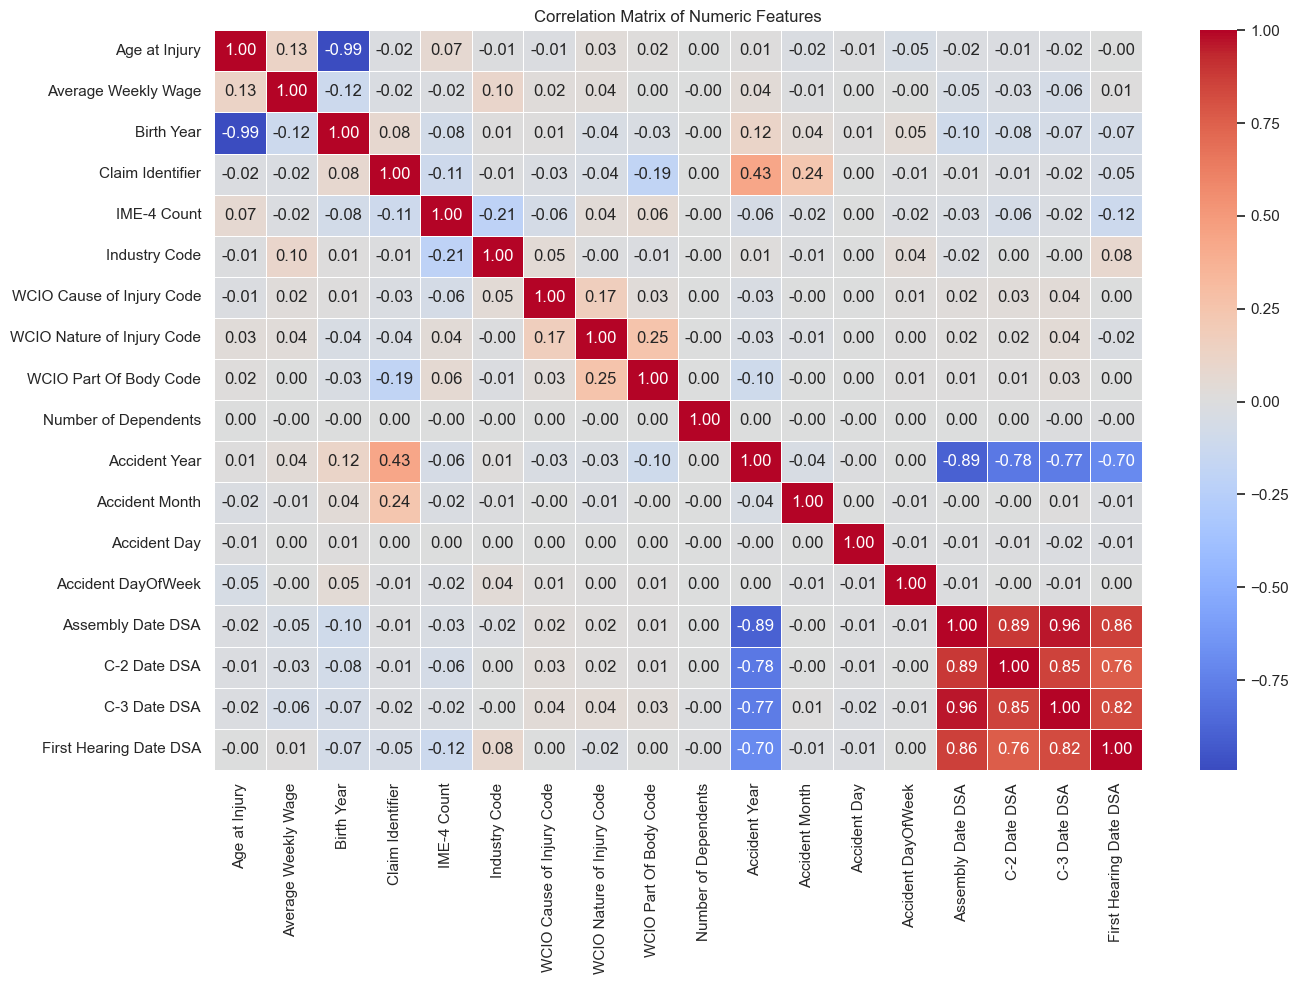

In [41]:
# Selecting numeric columns for correlation analysis
numeric_columns = df_train.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df_train[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

### High Positive Correlations Between Date Variables:
- Assembly Date DSA, C2 Date DSA, C3 Date DSA, and First Hearing Date DSA show very high positive correlations, ranging from 0.76 to 0.96. This aligns with the fact that these date variables are closely related and represent different stages in the claims process, such as when the case was first assembled, when the relevant forms were received (C2, C3), and when the first hearing took place.
- Conclusion: These date variables likely follow a similar timeline, meaning that if one event occurs, the others are also likely to happen around the same time. The correlation suggests that the claims process follows a clear and predictable order, where events tend to happen sequentially.
### Negative Correlation Between Accident Year and Date Variables:
- Accident Year shows a strong negative correlation with Assembly Date DSA, C2 Date DSA, C3 Date DSA, and First Hearing Date DSA, with values ranging from -0.70 to -0.80. This indicates that as the accident year increases, the associated dates (assembly, C2, C3, and first hearing) tend to occur earlier in the timeline.
- Conclusion: This could suggest that more recent claims (with higher accident years) may be processed more quickly, or it could indicate that older claims are still in the system, leading to delays in their finalization. It may also imply that claims related to more recent accidents are processed faster than those from earlier years, possibly due to improvements in the claims handling system or changes in workflow over time.
### Strong Negative Correlation Between Age at Injury and Birth Year:
- Age at Injury and Birth Year exhibit a very strong negative correlation of -0.99, as expected, because these two variables should essentially subtract to the same value (the year of injury minus the birth year).
- Conclusion: This negative correlation is logical since age at injury is directly tied to the birth year. A person’s age at the time of injury is simply the difference between the injury year and the birth year, resulting in a near-perfect inverse relationship.
### Positive Correlation Between Accident Year and Claim Identifier:
- Accident Year has a moderate positive correlation of 0.43 with Claim Identifier.
- Conclusion: This suggests that the accident year is somewhat related to the claim identifier, implying that claims from specific years may be grouped or numbered in a way that reflects the year of the accident. While this correlation is not particularly strong, it indicates a potential pattern that could be useful for tracking claims by year or identifying trends in claim processing.


### Exploring the Relationship Between District Name and Carrier Name

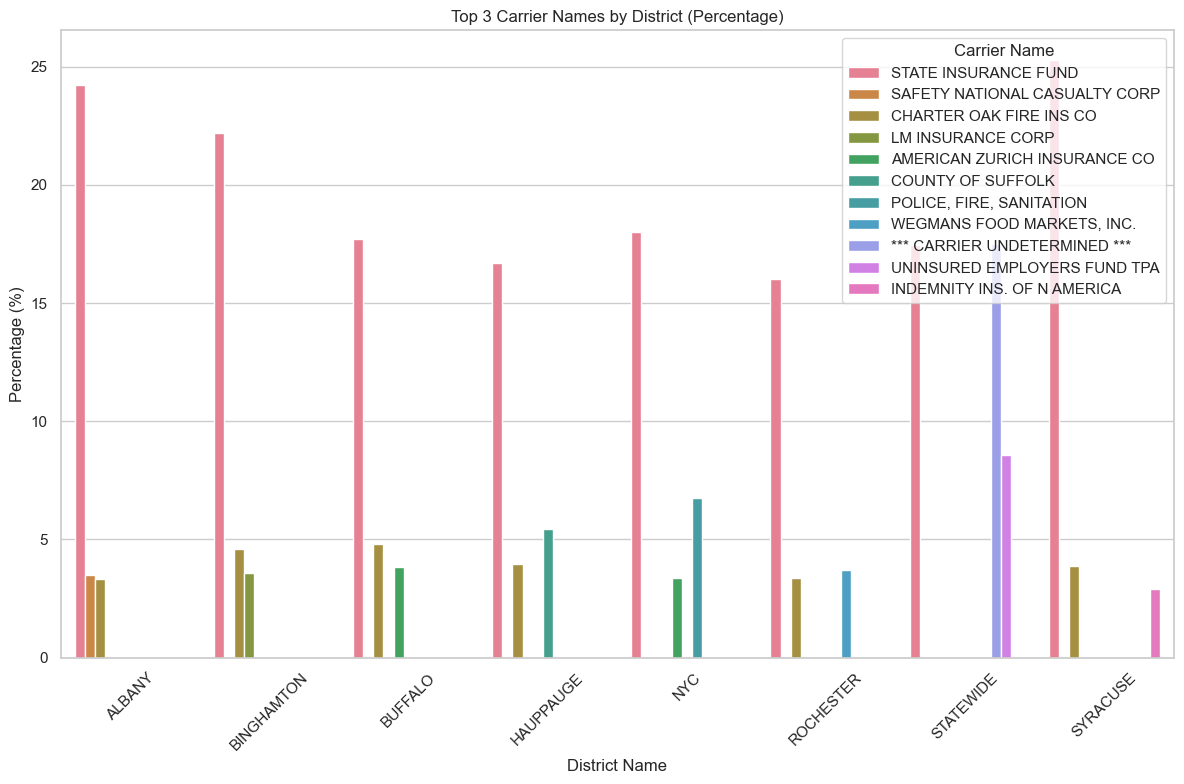

In [6]:
# Step 1: Calculate counts for each district and carrier name
top_carriers = (
    df_train
    .groupby(['District Name', 'Carrier Name'])
    .size()
    .reset_index(name='Count')
)
# Step 2: Calculate the total count per district
top_carriers['Total Count'] = top_carriers.groupby('District Name')['Count'].transform('sum')
# Step 3: Calculate the percentage of each carrier name within each district
top_carriers['Percentage'] = (top_carriers['Count'] / top_carriers['Total Count']) * 100
# Step 4: Sort and select the top 3 carrier names for each district
top_3_carriers_per_district = (
    top_carriers
    .sort_values(['District Name', 'Percentage'], ascending=[True, False])
    .groupby('District Name')
    .head(3)
)
# Step 5: Plot the percentages as a bar plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
# Bar plot with 'District Name' on x-axis, 'Percentage' on y-axis, and hue as 'Carrier Name'
sns.barplot(
    data=top_3_carriers_per_district,
    x='District Name',
    y='Percentage',
    hue='Carrier Name',
    dodge=True
)
plt.xlabel('District Name')
plt.ylabel('Percentage (%)')
plt.title('Top 3 Carrier Names by District (Percentage)')
# Rotate x-axis labels for readability if needed
plt.xticks(rotation=45)
# Display the legend and the plot
plt.legend(title='Carrier Name')
plt.tight_layout()
plt.show()

### Exploring the Relationship Between District Name and Industry Code Description

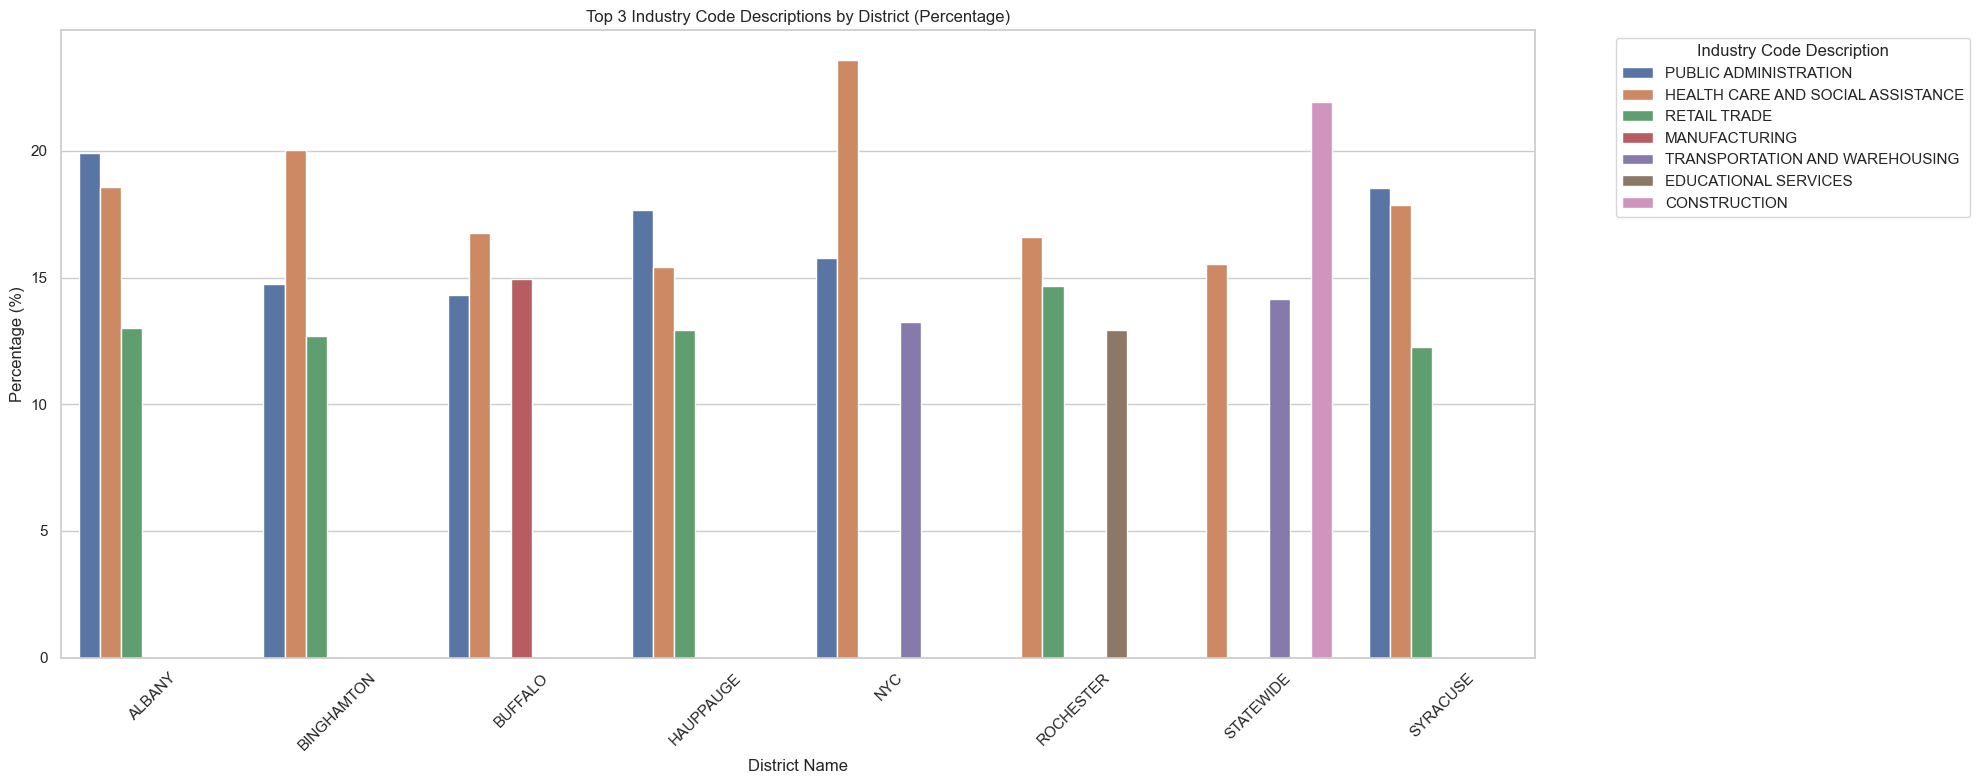

In [7]:
# Step 1: Calculate counts for each district and industry code description
top_industries = (
    df_train
    .groupby(['District Name', 'Industry Code Description'],observed=False)
    .size()
    .reset_index(name='Count')
)

# Step 2: Calculate the total count per district
top_industries['Total Count'] = top_industries.groupby('District Name',observed=False)['Count'].transform('sum')

# Step 3: Calculate the percentage of each industry code description within each district
top_industries['Percentage'] = (top_industries['Count'] / top_industries['Total Count']) * 100

# Step 4: Sort and select the top 3 industry code descriptions for each district
top_3_industries_per_district = (
    top_industries
    .sort_values(['District Name', 'Percentage'], ascending=[True, False])
    .groupby('District Name',observed=False)
    .head(3)
)

# Step 5: Plot the percentages as a bar plot
plt.figure(figsize=(20, 8))
sns.set(style="whitegrid")

# Bar plot with 'District Name' on x-axis, 'Percentage' on y-axis, and hue as 'Industry Code Description'
sns.barplot(
    data=top_3_industries_per_district,
    x='District Name',
    y='Percentage',
    hue='Industry Code Description',
    dodge=True
)

# Set plot labels and title
plt.xlabel('District Name')
plt.ylabel('Percentage (%)')
plt.title('Top 3 Industry Code Descriptions by District (Percentage)')

# Rotate x-axis labels for readability if needed
plt.xticks(rotation=45)

# Display the legend and the plot
plt.legend(title='Industry Code Description',fancybox=True,alignment='center', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

### Exploring the Relationship Between District Name and Average Weekly Wage

C:\Users\ritae\AppData\Local\Temp\ipykernel_9880\3526924353.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


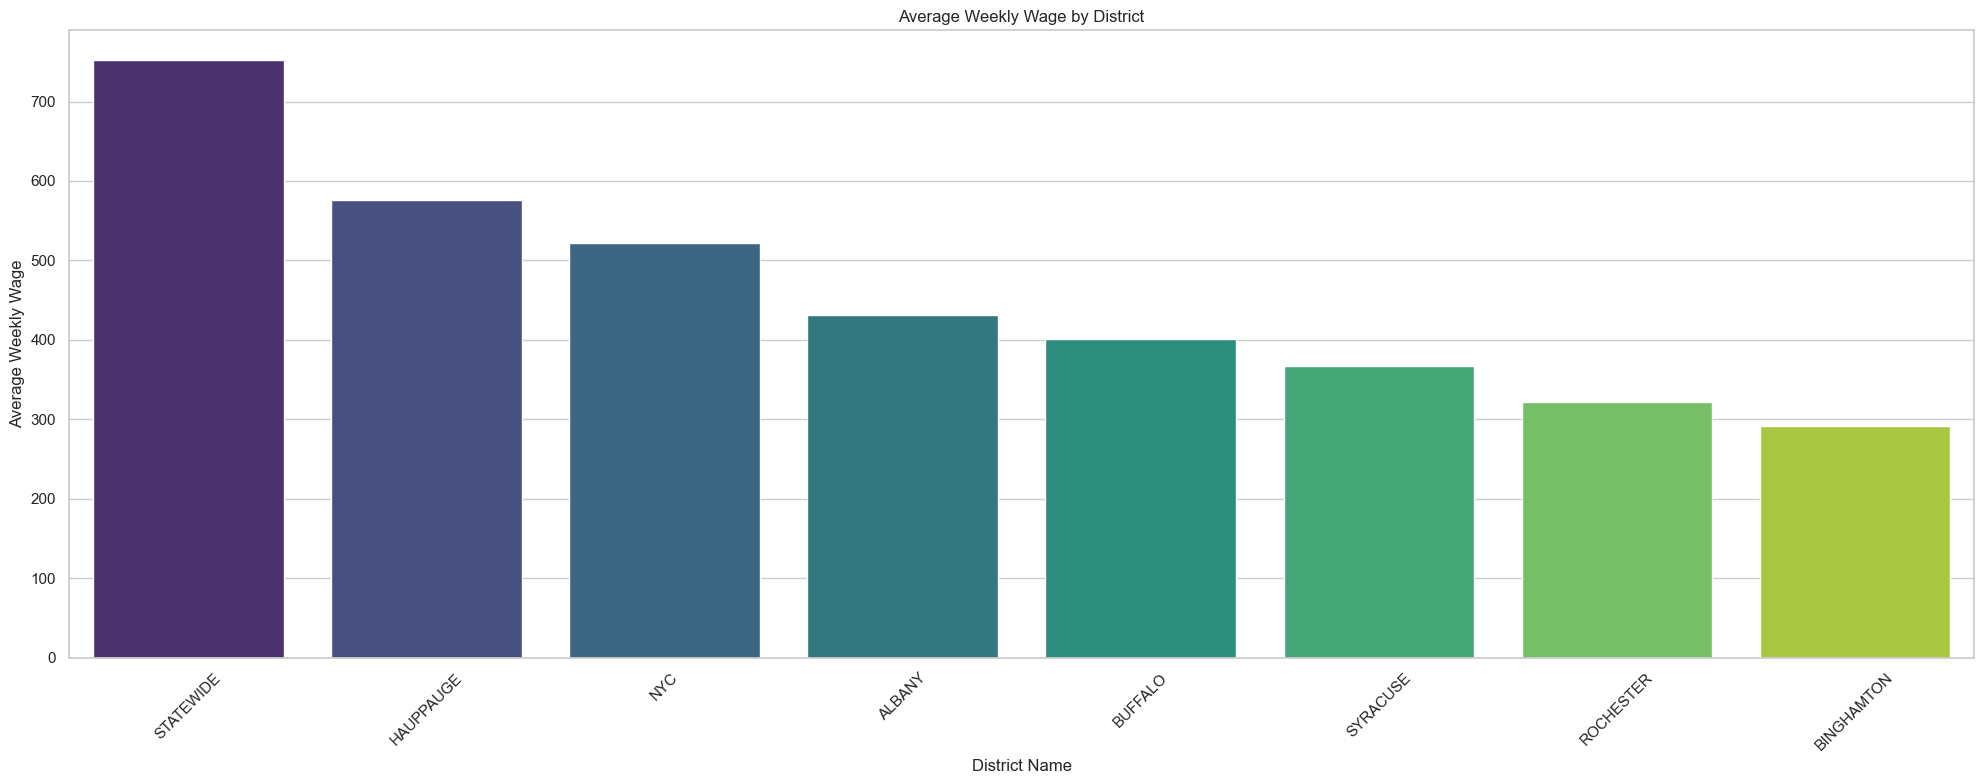

In [8]:
avg_weekly_wage_per_district = (
    df_train
    .groupby('District Name', observed=False)['Average Weekly Wage']  # Assuming the column name is 'Average Weekly Wage'
    .mean()
    .reset_index(name='Average Weekly Wage')
)

# Step 2: Sort by average weekly wage in descending order
avg_weekly_wage_per_district = avg_weekly_wage_per_district.sort_values(by='Average Weekly Wage', ascending=False)

# Step 3: Plot the average weekly wage for each district as a bar plot
plt.figure(figsize=(20, 8))
sns.set(style="whitegrid")

# Bar plot with 'District Name' on x-axis, 'Average Weekly Wage' on y-axis
sns.barplot(
    data=avg_weekly_wage_per_district,
    x='District Name',
    y='Average Weekly Wage',
    palette='viridis'  # Optional: Change the color palette
)

# Set plot labels and title
plt.xlabel('District Name')
plt.ylabel('Average Weekly Wage')
plt.title('Average Weekly Wage by District')

# Rotate x-axis labels for readability if needed
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

### Exploring the Relationship Between Gender and Average Weekly Wage

C:\Users\ritae\AppData\Local\Temp\ipykernel_9880\2511393091.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


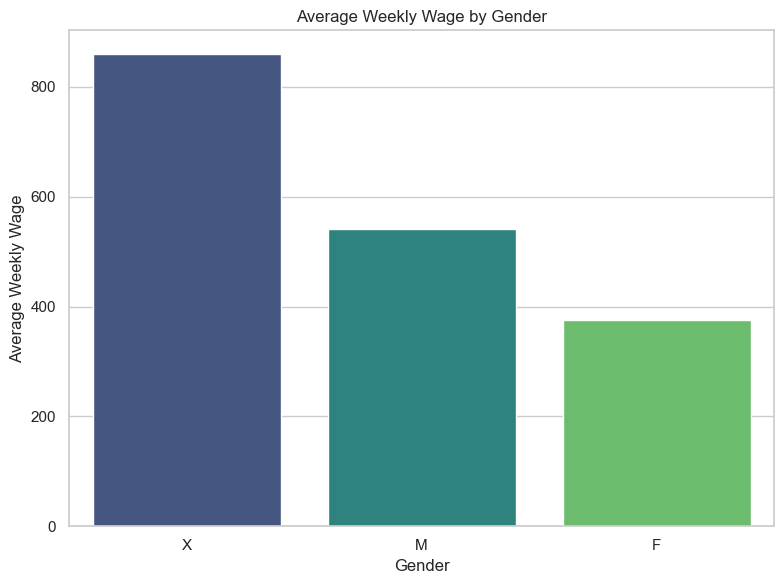

In [9]:
# Step 1: Calculate the average weekly wage for each gender
avg_weekly_wage_per_gender = (
    df_train
    .groupby('Gender', observed=False)['Average Weekly Wage']  # Grouping by 'Gender' instead of 'District Name'
    .mean()
    .reset_index(name='Average Weekly Wage')
)

# Step 2: Sort by average weekly wage in descending order
avg_weekly_wage_per_gender = avg_weekly_wage_per_gender.sort_values(by='Average Weekly Wage', ascending=False)

# Step 3: Plot the average weekly wage for each gender as a bar plot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Bar plot with 'Gender' on x-axis, 'Average Weekly Wage' on y-axis
sns.barplot(
    data=avg_weekly_wage_per_gender,
    x='Gender',
    y='Average Weekly Wage',
    palette='viridis'  # Optional: Change the color palette
)

# Set plot labels and title
plt.xlabel('Gender')
plt.ylabel('Average Weekly Wage')
plt.title('Average Weekly Wage by Gender')

# Rotate x-axis labels for readability if needed
plt.xticks(rotation=0)  # You can adjust the rotation if necessary

# Display the plot
plt.tight_layout()
plt.show()


### Exploring the Relationship Between Gender and Average Weekly Wage

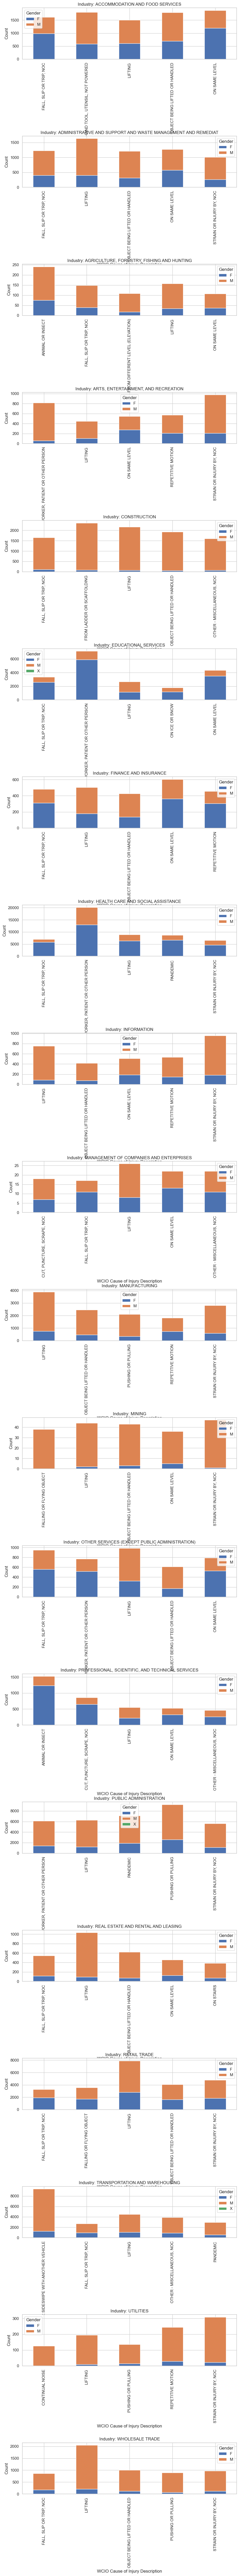

In [10]:

# Step 1: Group and count occurrences
df_counts = df_train.groupby(['Industry Code Description', 'WCIO Cause of Injury Description', 'Gender']).size().reset_index(name='Count')

# Step 2: Get the top 5 causes for each industry by summing across genders
top_causes = (
    df_counts.groupby(['Industry Code Description', 'WCIO Cause of Injury Description'])['Count']
    .sum()
    .reset_index()
    .sort_values(['Industry Code Description', 'Count'], ascending=[True, False])
    .groupby('Industry Code Description')
    .head(5)
)

# Step 3: Merge back to get gender-specific counts only for the top 5 causes
df_top_causes = df_counts.merge(
    top_causes[['Industry Code Description', 'WCIO Cause of Injury Description']],
    on=['Industry Code Description', 'WCIO Cause of Injury Description'],
    how='inner'
)

# Step 4: Plotting
industries = df_top_causes['Industry Code Description'].unique()
fig, axes = plt.subplots(len(industries), 1, figsize=(10, 5 * len(industries)))

for ax, industry in zip(axes, industries):
    # Filter for each industry
    industry_data = df_top_causes[df_top_causes['Industry Code Description'] == industry]

    # Pivot to create a table suitable for stacked bar plot
    industry_pivot = industry_data.pivot_table(
        index='WCIO Cause of Injury Description', columns='Gender', values='Count', fill_value=0, observed=False
    )

    # Plot
    industry_pivot.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Industry: {industry}')
    ax.set_ylabel('Count')

    # Set x-label for each plot
    ax.set_xlabel('WCIO Cause of Injury Description')

# Adjust spacing between subplots for better visibility of x labels
plt.tight_layout(pad=3.0)  # Increase padding between subplots
plt.subplots_adjust(hspace=1.5)  # Manually adjust the height space between plots

plt.show()
#

### Exploring the Relationship Between Age Group and Claim Injury Type

C:\Users\ritae\AppData\Local\Temp\ipykernel_9880\3620686758.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df_train.groupby(['Claim Injury Type', 'Age Group']).size().reset_index(name='Count')


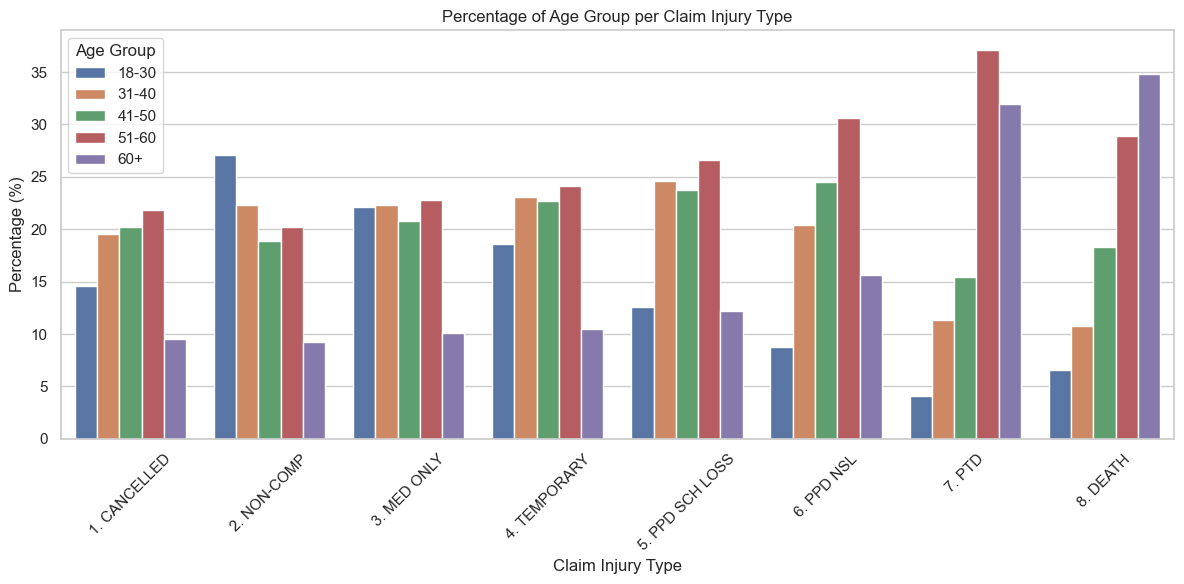

In [11]:

# Bin Age into categories (e.g., 18-30, 31-40, etc.)
df_train['Age Group'] = pd.cut(df_train['Age at Injury'], bins=[18, 30, 40, 50, 60, 100],
                               labels=['18-30', '31-40', '41-50', '51-60', '60+'])

# Step 1: Group by 'Claim Injury Type' and 'Age Group', then count occurrences
age_group_counts = df_train.groupby(['Claim Injury Type', 'Age Group']).size().reset_index(name='Count')

# Step 2: Calculate the total count for each 'Claim Injury Type'
total_counts = df_train.groupby('Claim Injury Type')['Claim Injury Type'].count().reset_index(name='Total Count')

# Step 3: Merge the counts back to the original grouped data to calculate percentages
age_group_counts = pd.merge(age_group_counts, total_counts, on='Claim Injury Type')

# Step 4: Calculate the percentage
age_group_counts['Percentage'] = (age_group_counts['Count'] / age_group_counts['Total Count']) * 100

# Step 5: (Optional) Drop the 'Total Count' column if not needed
age_group_counts = age_group_counts.drop(columns=['Total Count'])

# Step 6: Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Claim Injury Type', y='Percentage', hue='Age Group', data=age_group_counts)

# Step 7: Titles and labels
plt.title('Percentage of Age Group per Claim Injury Type')
plt.ylabel('Percentage (%)')
plt.xlabel('Claim Injury Type')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

C:\Users\ritae\AppData\Local\Temp\ipykernel_9880\2954611342.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_train, x='Claim Injury Type', y='Age at Injury', inner='quart', palette='Set2')


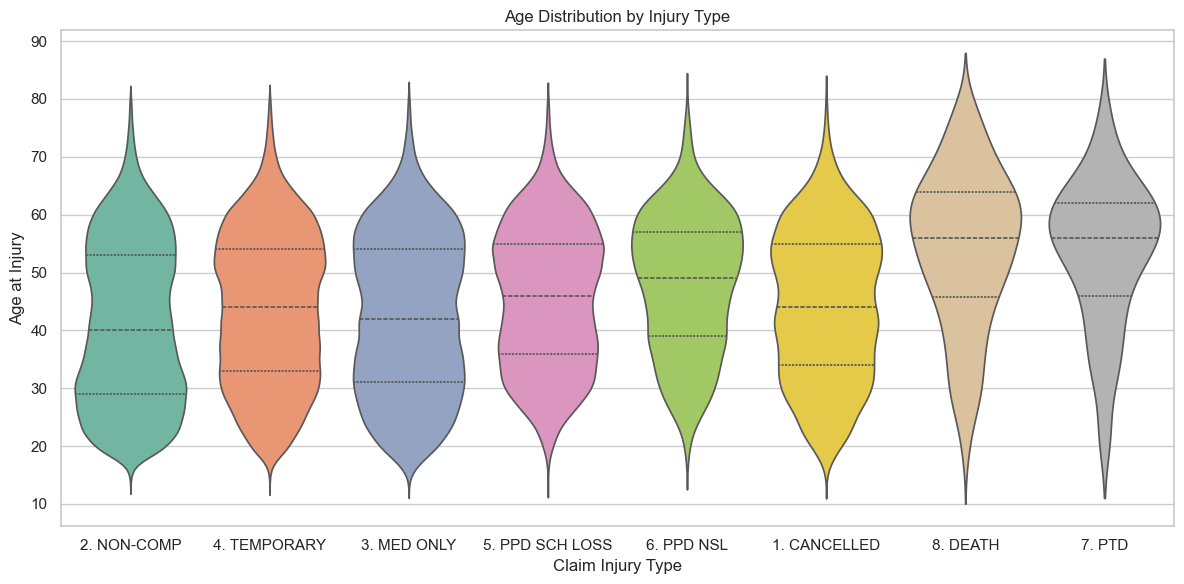

In [59]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_train, x='Claim Injury Type', y='Age at Injury', inner='quart', palette='Set2')
plt.title('Age Distribution by Injury Type')
plt.xlabel('Claim Injury Type')
plt.ylabel('Age at Injury')
plt.tight_layout()
plt.show()

Observations: 

- Death claims predominantly affect older age groups, with the highest frequency observed in those aged 60+, followed by the 51-60 age group, and then 41-50, and so on. There appears to be a linear regression between age and death claims: the older the age group, the higher the frequency of death claims. This is likely related to the fact that older individuals are more prone to other underlying health conditions, which may contribute to death.
Similarly, PTD claims show a higher prevalence in the 51-60 age group, followed by 60+. This could suggest that age, combined with the potential for cumulative health issues, contributes to more severe injuries that result in permanent disability.
Non-comp Claims:

- The 18-30 age group has the highest frequency of non-comp claims, followed by the 31-40 age group. This suggests that younger workers tend to file more non-compensable claims, possibly due to a higher incidence of less severe injuries, such as soft tissue injuries or conditions that don't result in long-term disabilities.

- Claims for Med-Only, Temporary Injuries, and PPD Sch Loss (Permanent Partial Disability Schedule Loss) appear to be more evenly distributed across age groups, with no strong or clear relationship between these injury types and age. These types of claims seem to affect a broad spectrum of ages without a noticeable pattern, suggesting that they may involve a variety of injuries not specifically linked to age.

Conclusions:

- Death and PTD claims are more common in older age groups: As expected, death and permanent disability claims show a clear trend towards higher frequencies in older individuals. This may be due to age-related health decline and the accumulation of long-term conditions that could lead to death or permanent disability.

- Younger workers are more likely to file non-comp claims: The higher frequency of non-comp claims in the younger age groups (18-30 and 31-40) could indicate that younger workers are more prone to less severe injuries or incidents that do not result in long-term disabilities. These injuries are often non-compensable but may be more common in the general workforce.

- Med-Only, Temporary, and PPD Sch Loss are less age-dependent: These injury types seem to affect workers across a wider range of age groups without a clear trend or relationship with age. This suggests that these injuries may not be directly related to the age of the workers but could be influenced by other factors such as job type, work environment, or overall health.

- Age plays a significant role in severe injury types (Death and PTD), likely due to the cumulative effects of aging and the onset of additional health problems. Younger workers, on the other hand, appear to be more prone to non-comp claims, which are typically less severe injuries. The lack of strong correlations for other injury types suggests that these injuries may be more dependent on factors other than age, such as the nature of the work or accident itself.

### Exploring the Relationship Between Injury Types and Medical Fee Region

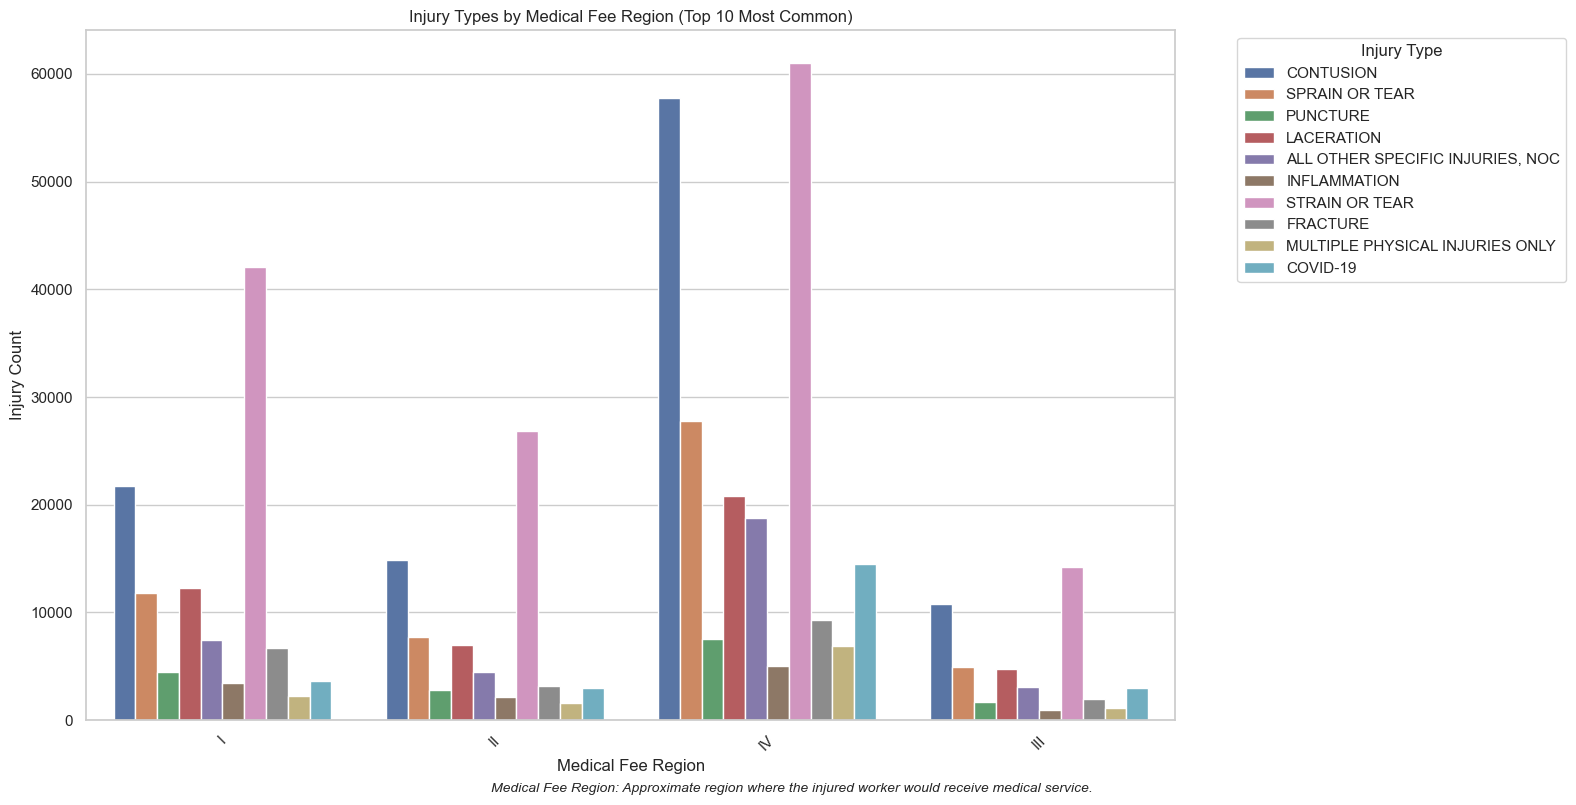

In [56]:
# Select the top 10 most common injury types
top_10_injury_types = df_train['WCIO Nature of Injury Description'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 most common injury types
df_filtered = df_train[df_train['WCIO Nature of Injury Description'].isin(top_10_injury_types)]

# Set the figure size
plt.figure(figsize=(16, 8))

# Create the grouped bar plot
sns.countplot(data=df_filtered, x='Medical Fee Region', hue='WCIO Nature of Injury Description')
plt.xlabel('Medical Fee Region')
plt.ylabel('Injury Count')
plt.title('Injury Types by Medical Fee Region (Top 10 Most Common)')
plt.legend(title='Injury Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a description for the Medical Fee Region
plt.figtext(0.5, 0.0, "Medical Fee Region: Approximate region where the injured worker would receive medical service.", ha="center", fontsize=10, style="italic")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- We observe that there are more records in the system associated with Medical Fee Region IV, followed by Region I. Medical Fee Regions II and III have the lowest occurrence. This suggests that Region IV may have a higher volume of claims or more frequent reporting, potentially due to a larger population or more significant workplace-related incidents. Region I may also have a higher reporting rate compared to Regions II and III, which might indicate differences in regional healthcare access, claim frequency, or regional priorities.
  
- Regardless of the medical fee region, strain or tear is the most frequently recorded injury type, followed by contusion and laceration. This pattern could indicate that musculoskeletal injuries like strains and tears are the most common in this dataset, possibly due to the nature of the industries represented. It may suggest that workers in this dataset are more prone to physical injuries involving muscle and ligament damage, which could be influenced by the type of work they perform.

- As expected, Medical Fee Region IV has the highest number of cases for strain or tear, contusion, laceration, COVID-19 cases, and so on, followed by Region I. This finding supports the idea that Region IV not only has a higher volume of claims overall but also tends to experience the highest frequency of certain injury types. This may be due to factors like a more industrialized environment or higher workforce density, which could result in more injuries. The presence of COVID-19 cases suggests that this region may have had a more significant impact from the pandemic, potentially due to the type of work or industries involved.

- Region II and Region III are the medical fee regions with the fewest records of injury types, although they follow the same pattern as Regions II and IV, with the highest number of strain or tear followed by contusion. Despite having fewer claims overall, Regions II and III show a similar pattern to Regions IV and I, indicating that musculoskeletal injuries such as strain or tear and contusion are the most common types of injuries across all regions. The lower number of claims could be due to a smaller workforce or less frequent reporting from these regions, though the injury type distribution remains consistent.

#### VERY IMPORTANT: We observe an inconsistency in the data, as there are two colors associated with the same injury type (orange and pink). This needs further investigation.

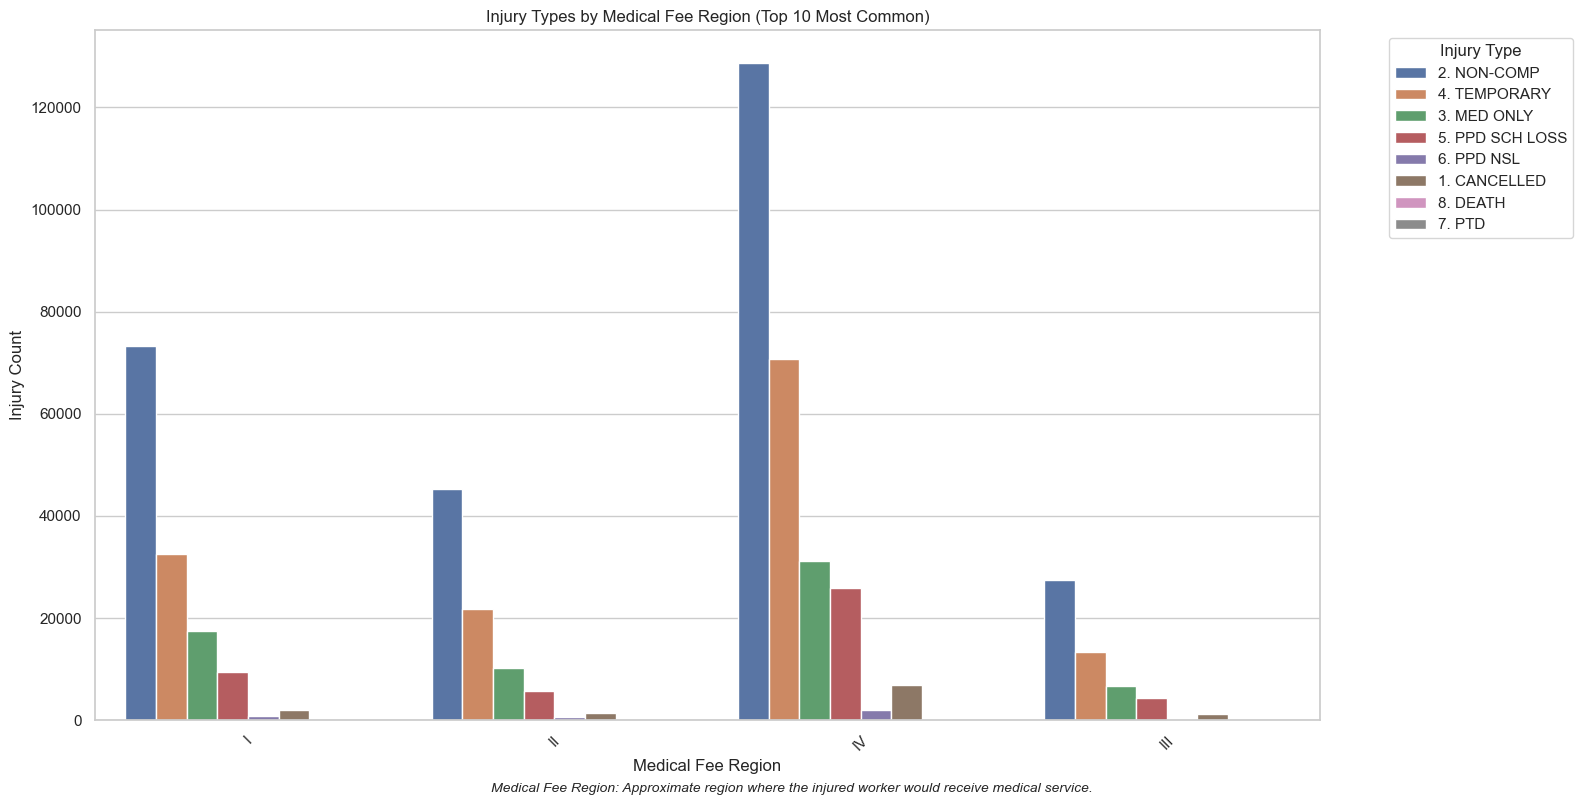

In [57]:
# Select the top 10 most common injury types
top_10_injury_types = df_train['Claim Injury Type'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 most common injury types
df_filtered = df_train[df_train['Claim Injury Type'].isin(top_10_injury_types)]

# Set the figure size
plt.figure(figsize=(16, 8))

# Create the grouped bar plot
sns.countplot(data=df_filtered, x='Medical Fee Region', hue='Claim Injury Type')
plt.xlabel('Medical Fee Region')
plt.ylabel('Injury Count')
plt.title('Injury Types by Medical Fee Region (Top 10 Most Common)')
plt.legend(title='Injury Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a description for the Medical Fee Region
plt.figtext(0.5, 0.0, "Medical Fee Region: Approximate region where the injured worker would receive medical service.", ha="center", fontsize=10, style="italic")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The injury type with the highest frequency across all four medical fee regions is non-comp, followed by temporary and med only. Death and PTD (Permanent Total Disability) injuries are in the minority in the dataset.

- Conclusion: The predominance of non-comp injuries suggests that most claims are for injuries that are non-compensable, indicating that a large portion of claims may involve less severe injuries or conditions that do not require long-term compensation. Temporary injuries also occur frequently, which may imply that many claims are related to short-term or recoverable injuries. On the other hand, Death and PTD injuries are rare, reflecting that the majority of claims are not associated with fatal or permanently disabling injuries.

- Deduction: Based on the graph above, we can infer that non-comp and temporary injury types are likely associated with contusions and strain or tear injuries. This suggests that most claims involving these injury types are related to soft tissue injuries or minor trauma, which are typically more common and recoverable than severe injuries like fractures or permanent disabilities.

- However, it is important to note that we observe a similar pattern across all medical fee regions in terms of injury types. This leads us to deduce that there is likely no direct relationship between medical fee regions and the type of injury. The frequency of injury types follows the same trend regardless of the medical fee region, suggesting that the type of injury is not determined by the medical fee region but rather other factors, such as the nature of the injuries themselves.

- In summary, while non-comp and temporary injuries dominate the dataset, they are most likely related to less severe injuries, such as contusions and strain or tear injuries. The Death and PTD categories remain minority categories, indicating that the dataset mainly includes claims for less critical injuries. The consistent pattern across all medical fee regions further supports the idea that the type of injury is not directly influenced by the medical fee region.

### Exploring the Relationship Between Injury Types and Zip Code 

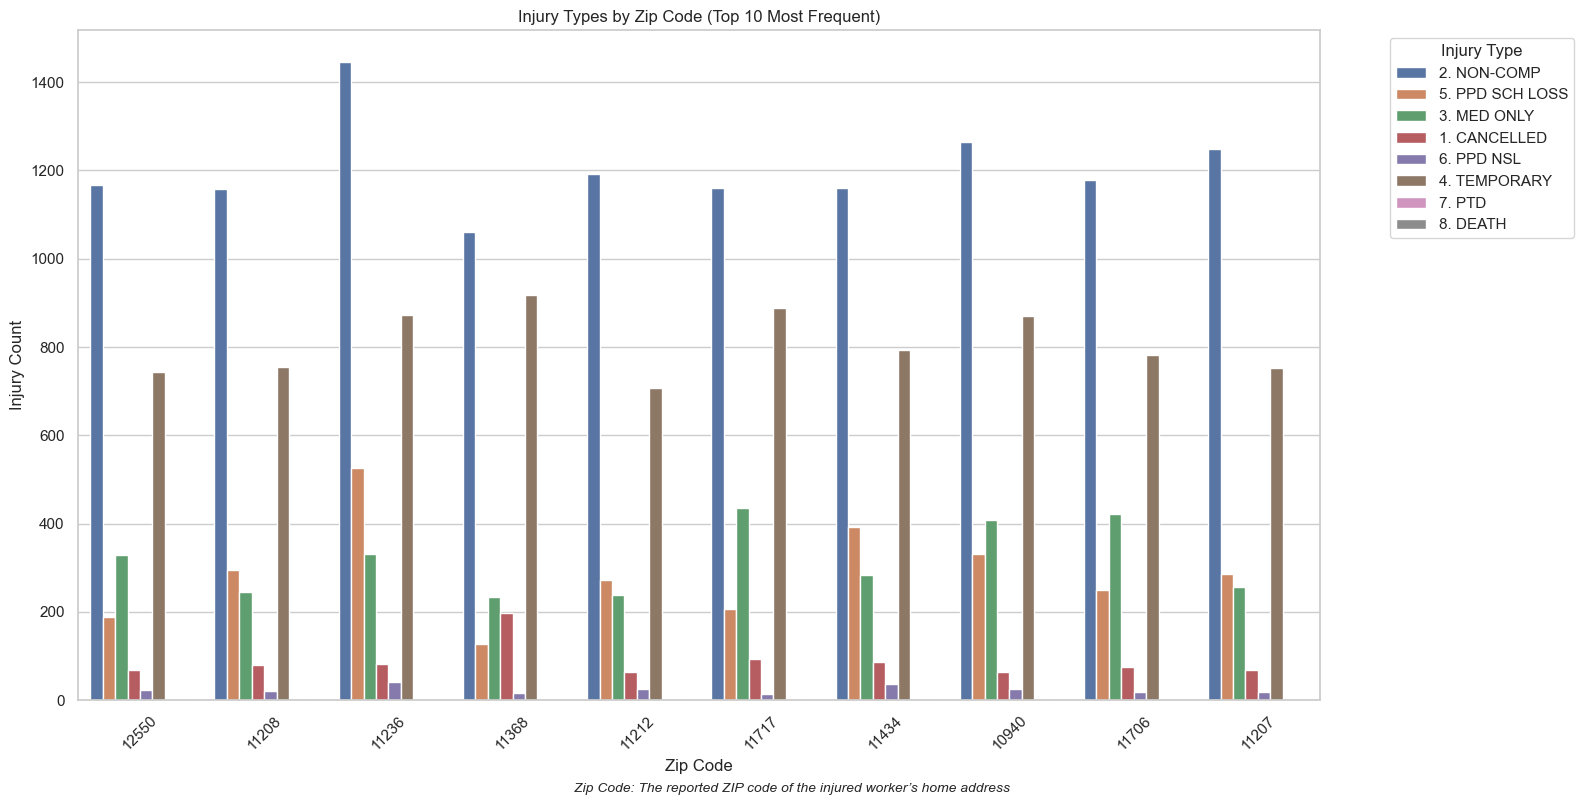

In [58]:
# Select the top 10 most frequent Zip Codes
top_zip_codes = df_filtered['Zip Code'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 most frequent Zip Codes
df_zip_filtered = df_filtered[df_filtered['Zip Code'].isin(top_zip_codes)]

# Set the figure size
plt.figure(figsize=(16, 8))

# Create the grouped bar plot
sns.countplot(data=df_zip_filtered, x='Zip Code', hue='Claim Injury Type')
plt.xlabel('Zip Code')
plt.ylabel('Injury Count')
plt.title('Injury Types by Zip Code (Top 10 Most Frequent)')
plt.legend(title='Injury Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a description for Zip Code
plt.figtext(0.5, 0.00, "Zip Code: The reported ZIP code of the injured worker’s home address", ha="center", fontsize=10, style="italic")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- We observe that Zip Code 11236 has the highest frequency of records for the non-comp injury type. This injury type is the most frequent in the dataset, regardless of the zip code, as we had concluded earlier. Additionally, Zip Code 11236 also has the highest number of records for temporary and PPD (Permanent Partial Disability) scheduled loss injury types. This appears to be correlated with the fact that there is a higher number of people associated with this zip code.

- Non-comp is the most frequently recorded injury type in the entire dataset, as we've observed across all zip codes. Zip Code 11236 stands out with higher records of temporary and PPD scheduled loss injuries, likely due to the larger population in that area.

- However, when analyzing the injury type distribution across other zip codes, we notice a similar pattern of injury frequency, with non-comp injuries being the most frequent across all zip codes. This suggests that the type of injury does not have a direct relationship with the zip code. The occurrence of injury types seems to be more influenced by other factors, such as the nature of work or general population health, rather than geographical location alone.

### Exploring the Relationship Between Injury Types Distribution and Accident Year

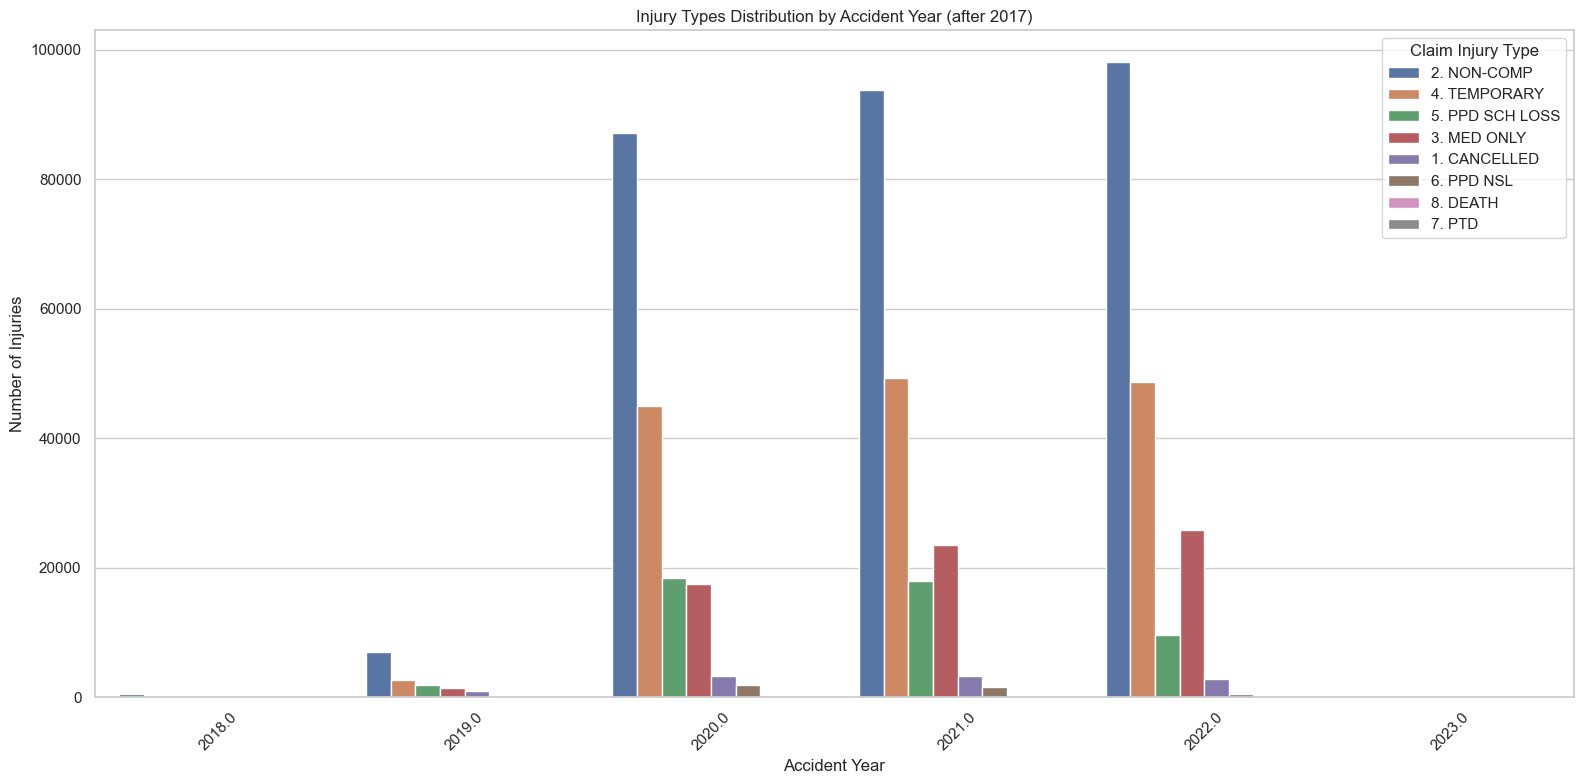

In [37]:
# Filter only the records with accident year after 2017
df_filtered = df_train[df_train['Accident Year'] > 2017]

# Bar plot for injury types by accident year (after 2017)
plt.figure(figsize=(16, 8))
sns.countplot(data=df_filtered, x='Accident Year', hue='Claim Injury Type')
plt.title('Injury Types Distribution by Accident Year (after 2017)')
plt.xlabel('Accident Year')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Only the years from 2017 onwards were displayed, as this period contains the majority of records in our dataset, which are primarily concentrated in the years 2019, 2020, 2021, and 2022. 

- We observe that in these four years, there was an increase in the number of non-comp injury types. In contrast, temporary injuries increased from 2019 to 2020 but slightly decreased from 2021 to 2022. Med only injuries increased over these two years. On the other hand, PPD sch loss injuries increased from 2019 to 2020 but decreased progressively from 2020 to 2021 and from 2021 to 2022. The record for canceled injuries appears to have remained stable.

- The increase in non-comp injuries in 2019, 2020, and 2021 suggests that there might have been a rise in claims related to injuries that are non-compensable. This could indicate a shift in the types of claims being filed, potentially reflecting a greater number of less severe injuries that do not require long-term compensation.

- The trend for temporary injuries shows an increase from 2019 to 2020, followed by a slight decrease in 2021 and 2022. The sharp rise in temporary injuries between 2019 and 2020 may reflect the disruptions caused by the pandemic. During the early phase of COVID-19, many workplaces were adjusting to new health and safety measures, with more people working from home, changes in work routines, and potentially less experience with the new safety protocols. This could have led to an increase in short-term, non-serious injuries. Additionally, the pandemic may have caused a temporary rise in injuries due to factors like remote work environments, new workplace practices, or an initial lack of proper safety measures. The stabilization in 2021 and 2022 could reflect the adaptation to the new circumstances brought by the pandemic. Over time, workplaces likely became more accustomed to operating under COVID-19 restrictions, leading to improved safety protocols, better understanding of new work routines, and fewer short-term injuries.

- The steady increase in med only injuries over these years could indicate an increase in claims where medical treatment was provided but no compensation was required, perhaps due to minor injuries or cases where only medical costs were incurred.

- The decrease in PPD sch loss injuries from 2020 to 2022 may reflect a reduction in more serious permanent injuries. This could indicate that fewer workers were suffering from injuries that resulted in long-term disabilities, which may suggest improvements in workplace safety and injury prevention over time.

- The canceled injuries category remaining stable implies that the number of claims that were dismissed or withdrawn did not significantly change, which could indicate that external factors or procedural adjustments did not notably affect this category.

### Exploring the Relationship Between COVID-19 and Injury Type

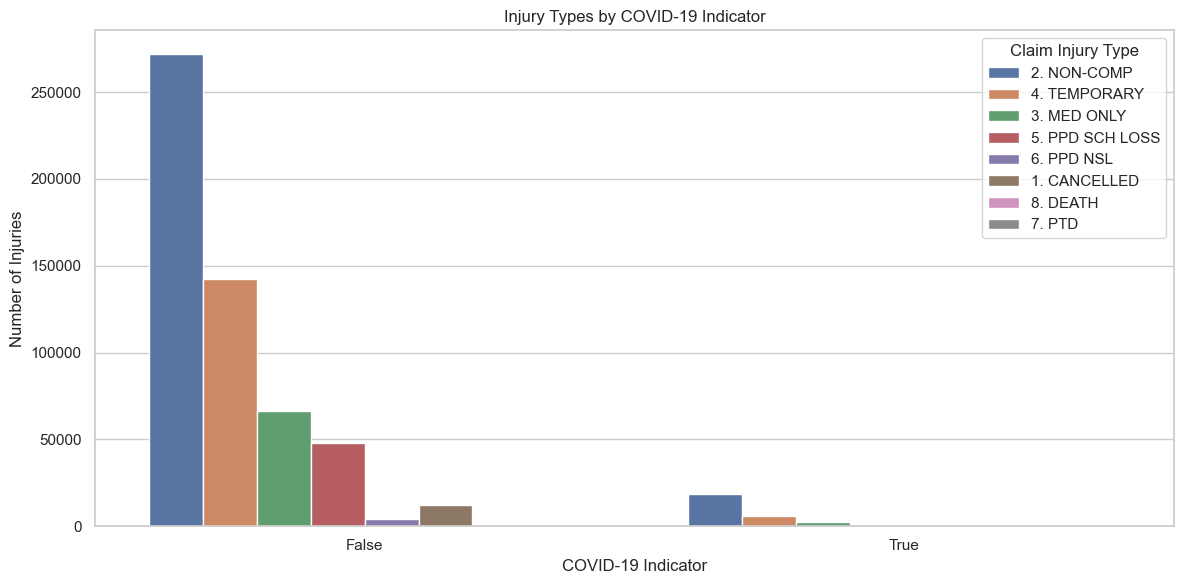

In [46]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train, x='COVID-19 Indicator', hue='Claim Injury Type')
plt.title('Injury Types by COVID-19 Indicator')
plt.xlabel('COVID-19 Indicator')
plt.ylabel('Number of Injuries')
plt.tight_layout()
plt.show()

- The high prevalence of non-comp claims related to COVID-19 suggests that while COVID-19 impacted workers' health, the resulting claims were typically for injuries or illnesses that did not require long-term compensation. It’s possible that COVID-19 claims in this category might involve workers who experienced mild symptoms or were temporarily impacted without facing lasting injury or permanent disability.

- The presence of temporary injury claims linked to COVID-19 indicates that the pandemic may have led to an increase in short-term, recoverable injuries, such as those caused by changes in the work environment or COVID-related disruptions.

- Med Only claims for COVID-19-related injuries suggest that some workers may have sought medical treatment for COVID-related symptoms or health issues but did not require significant time off work or long-term disability benefits.

- It’s notable that COVID-19-related claims do not seem to correlate strongly with more severe injury types like Permanent Total Disability (PTD) or Death. This aligns with the observation that while COVID-19 had significant health effects, the majority of claims are for conditions that were temporary or non-compensable.